In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Load the Data

In [13]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
val_df = pd.read_csv('val_data.csv')

### Initial Data Overview

In [14]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Validation shape:", val_df.shape)

Train shape: (1972, 6)
Test shape: (1057, 6)
Validation shape: (493, 6)


In [15]:
print("Train Data Info:")
train_df.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1972 non-null   int64 
 1   text        1972 non-null   object
 2   belong      1972 non-null   int64 
 3   belong_exp  1066 non-null   object
 4   burden      1972 non-null   int64 
 5   burden_exp  634 non-null    object
dtypes: int64(3), object(3)
memory usage: 92.6+ KB


In [16]:
print("First 5 rows")
train_df.head()

First 5 rows


,Unnamed: 0,text,belong,belong_exp,burden,burden_exp
0,2204,All my life i've been going through shit (only...,1,none of my friends understands,0,NaN
1,3075,Give me one good reason I should not kill myse...,0,NaN,0,NaN
2,704,I saw this tumblr post going around the intern...,0,NaN,1,on the verge of suicide
3,372,Over the last year I have felt like my life wa...,1,needed to tell someone,0,NaN
4,3050,I‚Äôm 16 I‚Äôve been severely suicidal since I...,1,I never received help,1,severely suicidal


### Check for Missing Values

In [17]:
train_df.isnull().sum()

Unnamed: 0       0
text             0
belong           0
belong_exp     906
burden           0
burden_exp    1338
dtype: int64

### Drop Unnecessary Columns

In [18]:
train_df = train_df.drop(columns=["Unnamed: 0"])

### Label Distribution

/tmp/ipykernel_133800/3226806604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='belong', data=train_df, palette='Blues')
/tmp/ipykernel_133800/3226806604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='burden', data=train_df, palette='Oranges')


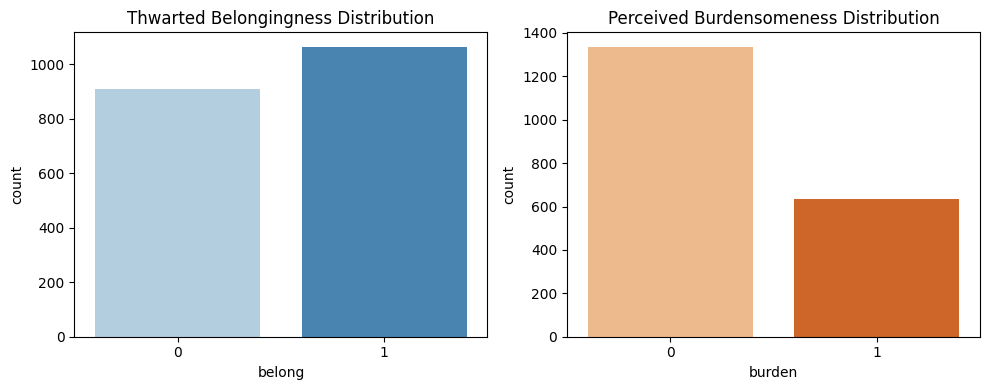

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='belong', data=train_df, palette='Blues')
plt.title('Thwarted Belongingness Distribution')
plt.subplot(1,2,2)
sns.countplot(x='burden', data=train_df, palette='Oranges')
plt.title('Perceived Burdensomeness Distribution')
plt.tight_layout()
plt.show()

### Text Length Analysis

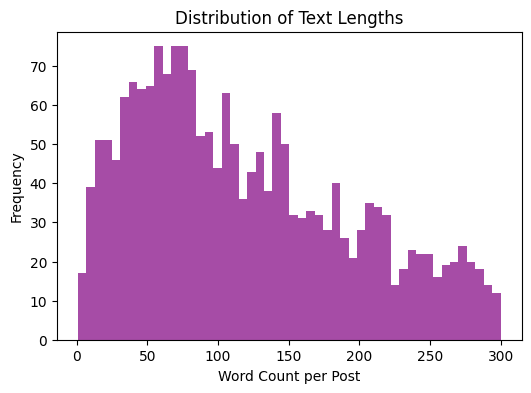

In [20]:
train_df['text_length'] = train_df['text'].str.split().apply(len)
plt.figure(figsize=(6,4))
plt.hist(train_df['text_length'], bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Word Count per Post')
plt.ylabel('Frequency')
plt.show()

In [21]:
print("\nText Length Summary:")
print(train_df['text_length'].describe())


Text Length Summary:
count    1972.000000
mean      118.930020
std        76.412259
min         1.000000
25%        58.000000
50%       104.000000
75%       174.000000
max       300.000000
Name: text_length, dtype: float64


### View Random Samples

In [24]:
print("\nRandom Text Samples:")
for i in range(3):
    sample = train_df.sample(1).iloc[0]
    print(f"\nText: {sample['text']}\nBelong: {sample['belong']} ({sample['belong_exp']})\nBurden: {sample['burden']} ({sample['burden_exp']})")


Random Text Samples:

Text: I spend every waking moment pondering my life purpose. I know I don‚Äôt have one. I get up, go to work to afford to pay every bill. I get up, go to class so I can have a career, to pay every bill and buy mundane things which add value to my life. But what is the point? At the end of the day, none of this matters. For anyone. No one has a purpose. Some people may be richer than others and can experience more things, but who cares? We all die anyway. Everyone spends 80-95 years chasing dreams that don‚Äôt matter, we‚Äôre all just existing to exist. This makes it hard for me to care about anything. Nothing matters to me. I‚Äôm in my last year of college and will have an education degree I plan to do nothing with because the thought of teaching 30 individuals to become something in life sends my anxiety through the roof. I truly just want to die and not deal with the unnecessary stress of life but that would then ruin the lives of my loved ones around me. I‚Äôm

### Explore Explanation Availability

In [26]:
belong_exp_ratio = train_df['belong_exp'].notnull().mean()*100
burden_exp_ratio = train_df['burden_exp'].notnull().mean()*100

print(f"\nAvailable Belongingness Explanations: {belong_exp_ratio:.2f}%")
print(f"Available Burdensomeness Explanations: {burden_exp_ratio:.2f}%")


Available Belongingness Explanations: 54.06%
Available Burdensomeness Explanations: 32.15%


### Word Cloud

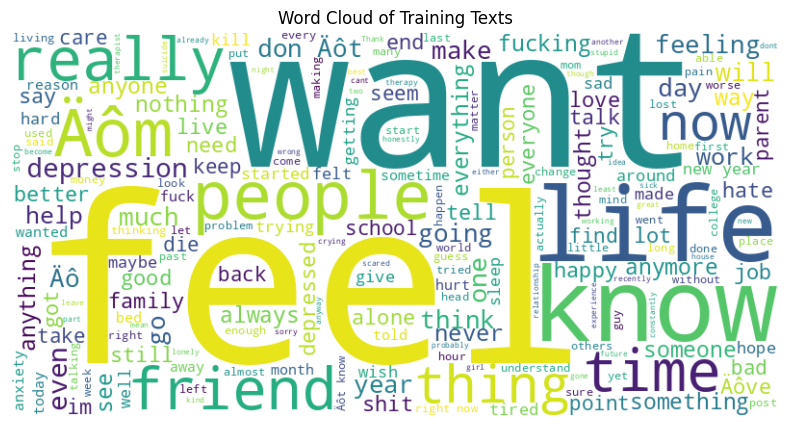

In [27]:
text_all = ' '.join(train_df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Training Texts')
plt.show()